In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None

In [2]:
site_conversion = pd.DataFrame(
    {
        'bf_sites': ['s1', 's2', 's3', 's4', 's5'],
        'fl_sites': ['s2', 's4', 's5', 's6', 's8'],
    }
)

grit_stats = pd.read_csv('~/SPECS_phil/data_tables/GritScores_MAD.csv', sep=';', index_col=0)
grit_stats = grit_stats.rename(columns={"plate": "plate_no"})

root_dir = '/scratch3-shared/phil/berzelius_non_grit_based/'
bf_file = 'bf_11cls_basic_aug_dmsonorm_750e_sgd/ResNet_resnet50/analysis.csv'
fl_file = 'fl_11cls_basic_aug_dmso_norm_750e_sgd/ResNet_resnet50/analysis.csv'
cp_file = 'bf_11cls_basic_aug_dmsonorm_750e_sgd/ResNet_resnet50/cp_moa_analysis.csv'
grit_stats = pd.read_csv('~/SPECS_phil/data_tables/GritScores_MAD.csv', sep=';', index_col=0)
grit_stats = grit_stats.rename(columns={"plate": "plate_no"})

for split in range(1, 6):
    bf_split = pd.read_csv(root_dir + 'bf_exps_1_split' + str(split) + '/' + bf_file, index_col=0)
    bf_split['split'] = np.repeat(split, len(bf_split))
    
    fl_split = pd.read_csv(root_dir + 'fl_exps_1_split' + str(split) + '/' + fl_file, index_col=0)
    fl_split['split'] = np.repeat(split, len(fl_split))
    
    cp_split = pd.read_csv(root_dir + 'bf_exps_1_split' + str(split) + '/' + cp_file)
    cp_split['split'] = np.repeat(split, len(cp_split))
    
    if split == 1:
        bf_df = bf_split
        fl_df = fl_split
        cp_df = cp_split
    else:
        bf_df = pd.concat([bf_df, bf_split], ignore_index=True, sort=False)
        fl_df = pd.concat([fl_df, fl_split], ignore_index=True, sort=False)
        cp_df = pd.concat([cp_df, cp_split], ignore_index=True, sort=False)

bf_df['fl_site'] = bf_df['site'].map(site_conversion.set_index('bf_sites')['fl_sites'])

In [3]:
cp_df

,plate,well,site,compound,moa,pred_moa,split
0,P015098,B23,s2,CBK307964,tubulin polymerization inhibitor,tubulin polymerization inhibitor,1
1,P015098,M18,s2,CBK200945,tubulin polymerization inhibitor,topoisomerase inhibitor,1
2,P015094,D03,s4,CBK308108,PARP inhibitor,PARP inhibitor,1
3,P015099,J19,s2,CBK309391,tubulin polymerization inhibitor,tubulin polymerization inhibitor,1
4,P015091,D15,s2,CBK278556G,HSP inhibitor,HSP inhibitor,1
...,...,...,...,...,...,...,...
7851,P015099,M06,s2,dmso,dmso,dmso,5
7852,P015099,M06,s4,dmso,dmso,dmso,5
7853,P015099,M06,s5,dmso,dmso,dmso,5
7854,P015099,M06,s6,dmso,dmso,dmso,5


In [4]:
fl_df

,plate,well,site,compound,moa,pred_moa,fv,x,y,split
0,P015076,E23,s2,CBK041182,topoisomerase inhibitor,protein synthesis inhibitor,[0.00393584 0.09419012 0.04442005 ... 0.199352...,-0.925398,0.347152,1
1,P015076,E23,s4,CBK041182,topoisomerase inhibitor,protein synthesis inhibitor,[0.00296363 0.11680281 0.02764179 ... 0.169603...,-0.858445,0.246460,1
2,P015076,E23,s5,CBK041182,topoisomerase inhibitor,protein synthesis inhibitor,[0.00473987 0.13675226 0.05883512 ... 0.228063...,-0.884359,0.323876,1
3,P015076,E23,s6,CBK041182,topoisomerase inhibitor,Aurora kinase inhibitor,[0.00843886 0.08777218 0.03878591 ... 0.199910...,-0.882682,0.279706,1
4,P015076,E23,s8,CBK041182,topoisomerase inhibitor,Aurora kinase inhibitor,[0.00151439 0.10476879 0.05119799 ... 0.217343...,-0.872903,0.310003,1
...,...,...,...,...,...,...,...,...,...,...
7885,P015099,M06,s2,dmso,dmso,protein synthesis inhibitor,[0.08699942 0.17975639 0.00496977 ... 0.005729...,10.927892,0.470209,5
7886,P015099,M06,s4,dmso,dmso,dmso,[0.07727448 0.10192139 0.00683287 ... 0.007216...,10.904860,0.495890,5
7887,P015099,M06,s5,dmso,dmso,dmso,[0.08809842 0.15050644 0.02091629 ... 0.006986...,10.921779,0.451134,5
7888,P015099,M06,s6,dmso,dmso,dmso,[0.07525773 0.10380878 0.00845149 ... 0.001518...,10.914246,0.463527,5


In [5]:
cp_df = cp_df[cp_df['compound']!='dmso'].reset_index(drop=True)

In [6]:
cp_df

,plate,well,site,compound,moa,pred_moa,split
0,P015098,B23,s2,CBK307964,tubulin polymerization inhibitor,tubulin polymerization inhibitor,1
1,P015098,M18,s2,CBK200945,tubulin polymerization inhibitor,topoisomerase inhibitor,1
2,P015094,D03,s4,CBK308108,PARP inhibitor,PARP inhibitor,1
3,P015099,J19,s2,CBK309391,tubulin polymerization inhibitor,tubulin polymerization inhibitor,1
4,P015091,D15,s2,CBK278556G,HSP inhibitor,HSP inhibitor,1
...,...,...,...,...,...,...,...
6951,P015099,I16,s2,CBK308876,retinoid receptor agonist,retinoid receptor agonist,5
6952,P015091,O15,s4,CBK277957,HDAC inhibitor,HDAC inhibitor,5
6953,P015098,N13,s8,CBK309020,topoisomerase inhibitor,retinoid receptor agonist,5
6954,P015092,H08,s5,CBK293908,JAK inhibitor,JAK inhibitor,5


In [7]:
bf_df = bf_df[bf_df['compound']!='dmso'].reset_index(drop=True)

In [8]:
bf_df

,plate,well,site,compound,moa,pred_moa,fv,x,y,split,fl_site
0,P015098,B23,s1,CBK307964,tubulin polymerization inhibitor,tubulin polymerization inhibitor,[0.01201181 0.02938199 0.12136054 ... 0.065279...,8.955906,-3.076284,1,s2
1,P015098,M18,s1,CBK200945,tubulin polymerization inhibitor,tubulin polymerization inhibitor,[0.1485314 0.06534398 0.2669378 ... 0.126663...,10.560531,-5.793812,1,s2
2,P015094,D03,s2,CBK308108,PARP inhibitor,PARP inhibitor,[0.0329602 0.22450857 0.07402993 ... 0.138493...,7.398640,10.462826,1,s4
3,P015099,J19,s1,CBK309391,tubulin polymerization inhibitor,tubulin polymerization inhibitor,[0.0440964 0.01620294 0.15627623 ... 0.066506...,19.748200,0.569540,1,s2
4,P015091,D15,s1,CBK278556G,HSP inhibitor,HDAC inhibitor,[0.03199631 0.07020781 0.09879724 ... 0.125481...,3.984672,9.286929,1,s2
...,...,...,...,...,...,...,...,...,...,...,...
6985,P015099,I16,s1,CBK308876,retinoid receptor agonist,retinoid receptor agonist,[0.07992171 0.05328283 0.15931687 ... 0.064620...,1.953916,9.307144,5,s2
6986,P015091,O15,s2,CBK277957,HDAC inhibitor,HDAC inhibitor,[0.1281761 0.06364631 0.09605409 ... 0.101355...,3.238267,15.305177,5,s4
6987,P015098,N13,s5,CBK309020,topoisomerase inhibitor,topoisomerase inhibitor,[0.10930799 0.06438663 0.03310043 ... 0.004164...,-3.228421,-6.542926,5,s8
6988,P015092,H08,s3,CBK293908,JAK inhibitor,PARP inhibitor,[0.05900198 0.23694733 0.07102789 ... 0.149192...,16.045702,5.554844,5,s5


In [9]:
bf_df['wsc'] = bf_df['well'] + bf_df['fl_site'] + bf_df['compound']

In [10]:
len(bf_df.wsc.unique())

6950

In [11]:
comps = np.unique(bf_df.compound)
grit_stats = grit_stats[grit_stats['Compound ID'].isin(comps)].reset_index(drop=True)
grit_stats['well'] = grit_stats['perturbation'].str.split('_', n=-1, expand=True)[2]
grit_stats['site'] = 's' + grit_stats['perturbation'].str.split('_', n=-1, expand=True)[3]

plate_barcodes = pd.read_csv('~/SPECS_phil/data_tables/plate_barcodes.csv')
plate_barcodes['plate_no'] = plate_barcodes['layout_id'].str.split('plate', n=1, expand=True)[1]

grit_stats['plate'] = grit_stats['plate_no'].map(plate_barcodes.set_index('plate_no')['barcode'])

grit_stats['pws'] = grit_stats['plate'] + grit_stats['well'] + grit_stats['site']

bf_df['pws'] = bf_df['plate'] + bf_df['well'] + bf_df['fl_site']
fl_df['pws'] = fl_df['plate'] + fl_df['well'] + fl_df['site']
cp_df['pws'] = cp_df['plate'] + cp_df['well'] + cp_df['site']

bf_df = bf_df[bf_df.pws.isin(grit_stats.pws)].reset_index(drop=True)
fl_df = fl_df[fl_df.pws.isin(grit_stats.pws)].reset_index(drop=True)
cp_df = cp_df[cp_df.pws.isin(grit_stats.pws)].reset_index(drop=True)

bf_df['grit'] = bf_df['pws'].map(grit_stats.set_index('pws')['grit'])
bf_df['nuclei'] = bf_df['pws'].map(grit_stats.set_index('pws')['Count_nuclei'])

fl_df['grit'] = fl_df['pws'].map(grit_stats.set_index('pws')['grit'])
fl_df['nuclei'] = fl_df['pws'].map(grit_stats.set_index('pws')['Count_nuclei'])

cp_df['grit'] = cp_df['pws'].map(grit_stats.set_index('pws')['grit'])
cp_df['nuclei'] = cp_df['pws'].map(grit_stats.set_index('pws')['Count_nuclei'])

bf_df['correct'] = np.where(bf_df['moa']==bf_df['pred_moa'], 1, 0)
fl_df['correct'] = np.where(fl_df['moa']==fl_df['pred_moa'], 1, 0)
cp_df['correct'] = np.where(cp_df['moa']==cp_df['pred_moa'], 1, 0)

In [12]:
print('GRIT: AUROC scores')
print('BF logistic regression')
nan_rem = ~np.isnan(bf_df[['grit', 'nuclei']].to_numpy()).any(axis=1)

X0 = bf_df[['grit', 'nuclei']].to_numpy()[nan_rem]
scaler = StandardScaler().fit(X0)
X0 = scaler.transform(X0)
X = X0[:, 0].reshape(-1, 1)
y = bf_df['correct'][nan_rem]
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print(np.round(roc_auc_score(y, clf.predict_proba(X)[:, 1]), 3))

print('FL logistic regression')
nan_rem = ~np.isnan(fl_df[['grit', 'nuclei']].to_numpy()).any(axis=1)

X0 = fl_df[['grit', 'nuclei']].to_numpy()[nan_rem]
scaler = StandardScaler().fit(X0)
X0 = scaler.transform(X0)
X = X0[:, 0].reshape(-1, 1)
y = fl_df['correct'][nan_rem]
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print(np.round(roc_auc_score(y, clf.predict_proba(X)[:, 1]), 3))

print('CP logistic regression')
nan_rem = ~np.isnan(cp_df[['grit', 'nuclei']].to_numpy()).any(axis=1)

X0 = cp_df[['grit', 'nuclei']].to_numpy()[nan_rem]
scaler = StandardScaler().fit(X0)
X0 = scaler.transform(X0)
X = X0[:, 0].reshape(-1, 1)
y = cp_df['correct'][nan_rem]
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print(np.round(roc_auc_score(y, clf.predict_proba(X)[:, 1]), 3))

GRIT: AUROC scores
BF logistic regression
0.662
FL logistic regression
0.578
CP logistic regression
0.627


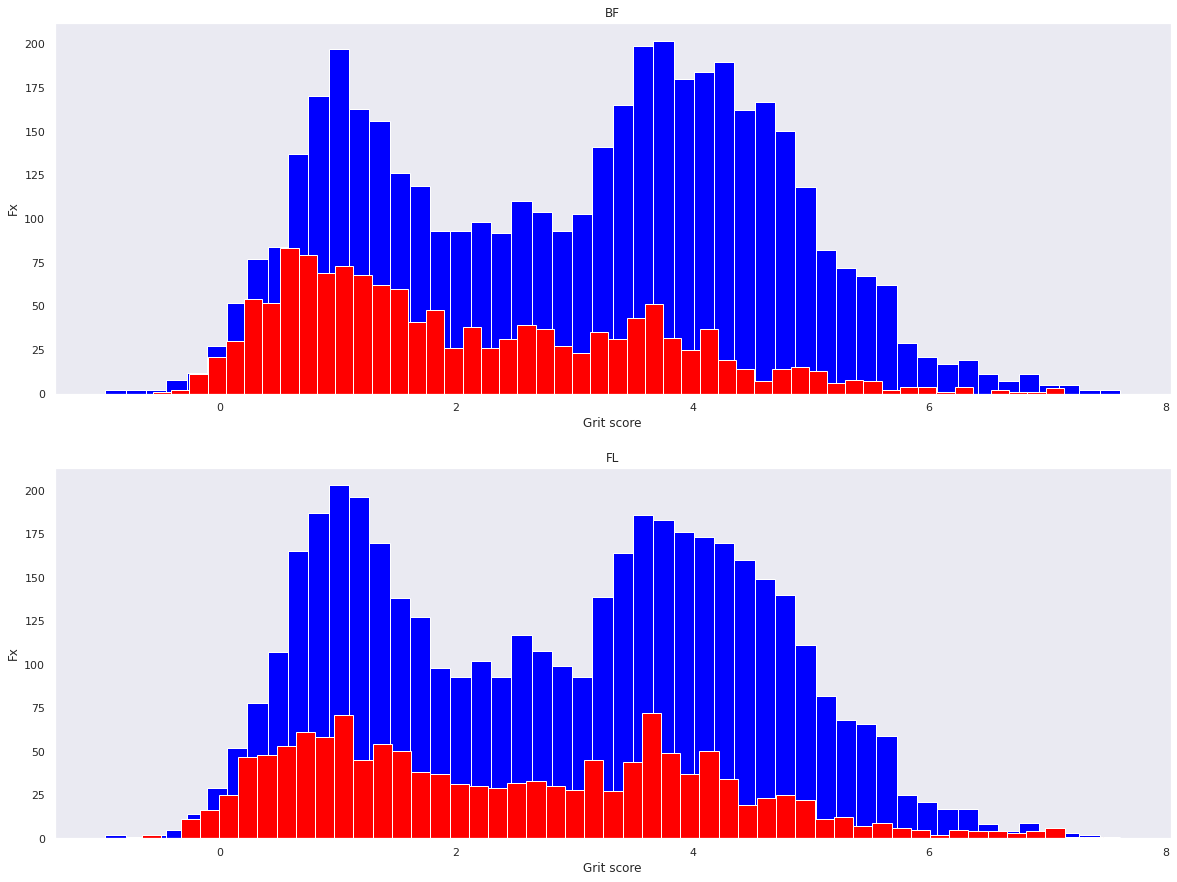

In [45]:
bf_correct = bf_df[bf_df['correct']==1]['grit'].values
bf_false = bf_df[bf_df['correct']==0]['grit'].values

fl_correct = fl_df[fl_df['correct']==1]['grit'].values
fl_false = fl_df[fl_df['correct']==0]['grit'].values

cp_correct = cp_df[cp_df['correct']==1]['grit'].values
cp_false = cp_df[cp_df['correct']==0]['grit'].values

sns.set_theme(style="dark")
fig = plt.figure(figsize=(20,15))

n_bins = 50
ax = fig.add_subplot(211)
plt.hist(bf_correct, color='blue', bins=n_bins)
plt.hist(bf_false, color='red', bins=n_bins)
plt.title('BF')
plt.xlabel('Grit score')
plt.ylabel('Fx')

ax = fig.add_subplot(212)
plt.hist(fl_correct, color='blue', bins=n_bins)
plt.hist(fl_false, color='red', bins=n_bins)
plt.title('FL')
plt.xlabel('Grit score')
plt.ylabel('Fx')

plt.show()
plt.close()

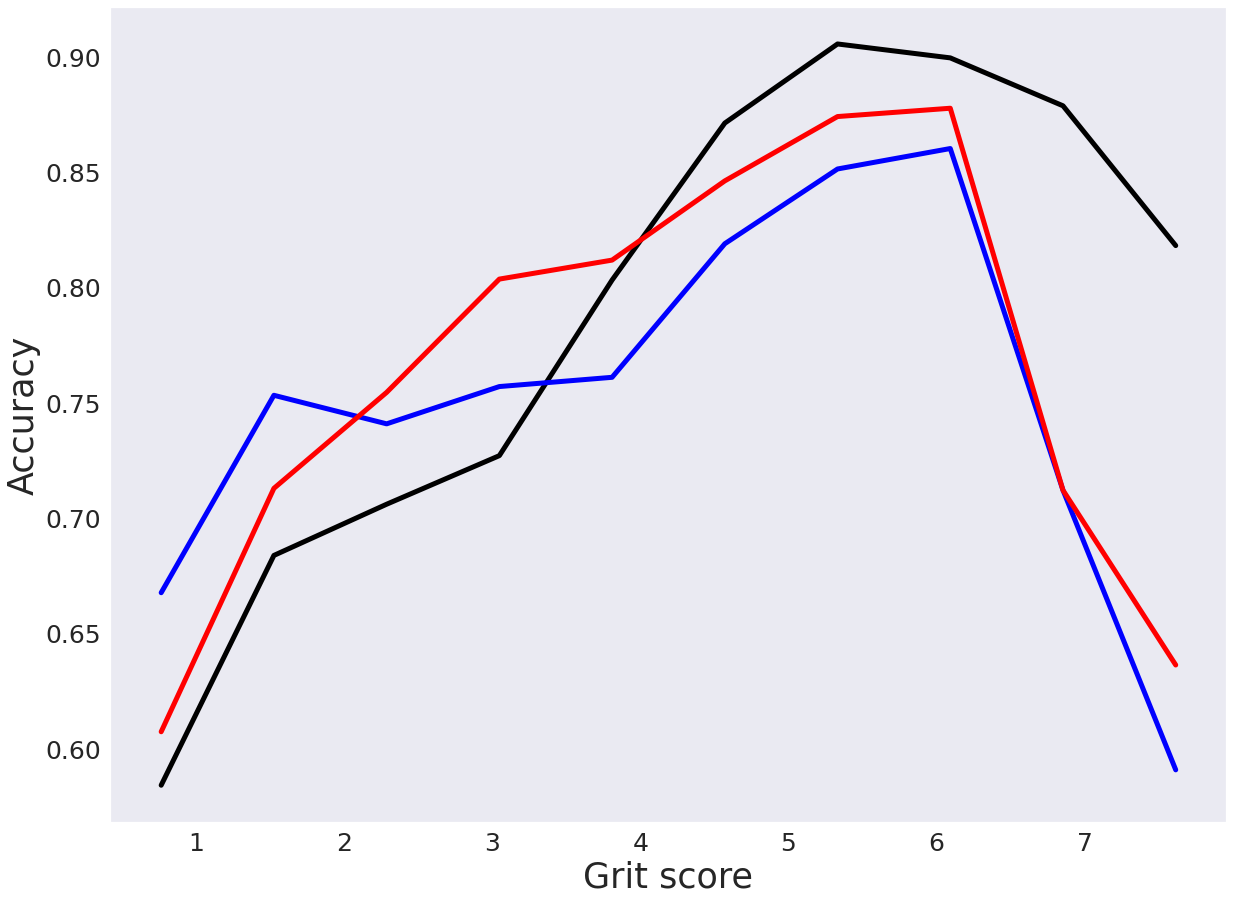

In [48]:
n_bins = 10

sns.set_theme(style="dark")
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

y_correct_bf, x=np.histogram(bf_correct, bins=n_bins, range=(0, np.max(bf_df.grit)))
y_false_bf, x=np.histogram(bf_false, bins=n_bins, range=(0, np.max(bf_df.grit)))
plt.plot(x[1:], (y_correct_bf/(y_correct_bf + y_false_bf)), color='black', lw=5)

y_correct_fl, x=np.histogram(fl_correct, bins=n_bins, range=(0, np.max(bf_df.grit)))
y_false_fl, x=np.histogram(fl_false, bins=n_bins, range=(0, np.max(bf_df.grit)))
plt.plot(x[1:], (y_correct_fl/(y_correct_fl + y_false_fl)), color='blue', lw=5)

y_correct_cp, x=np.histogram(cp_correct, bins=n_bins, range=(0, np.max(bf_df.grit)))
y_false_cp, x=np.histogram(cp_false, bins=n_bins, range=(0, np.max(bf_df.grit)))
plt.plot(x[1:], (y_correct_cp/(y_correct_cp + y_false_cp)), color='red', lw=5)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax.set_xlabel('Grit score', fontsize=35)
ax.set_ylabel('Accuracy', fontsize=35)

plt.savefig('LMRL_grit.png', bbox_inches='tight', format='png')

plt.show()
plt.close()

In [41]:
bf_df['false_dmso'] = np.where(bf_df['pred_moa']=='dmso', 1, 0)
fl_df['false_dmso'] = np.where(fl_df['pred_moa']=='dmso', 1, 0)

In [42]:
bf_df.moa.unique()

array(['tubulin polymerization inhibitor', 'PARP inhibitor',
       'HSP inhibitor', 'retinoid receptor agonist', 'JAK inhibitor',
       'topoisomerase inhibitor', 'protein synthesis inhibitor',
       'ATPase inhibitor', 'HDAC inhibitor', 'Aurora kinase inhibitor'],
      dtype=object)

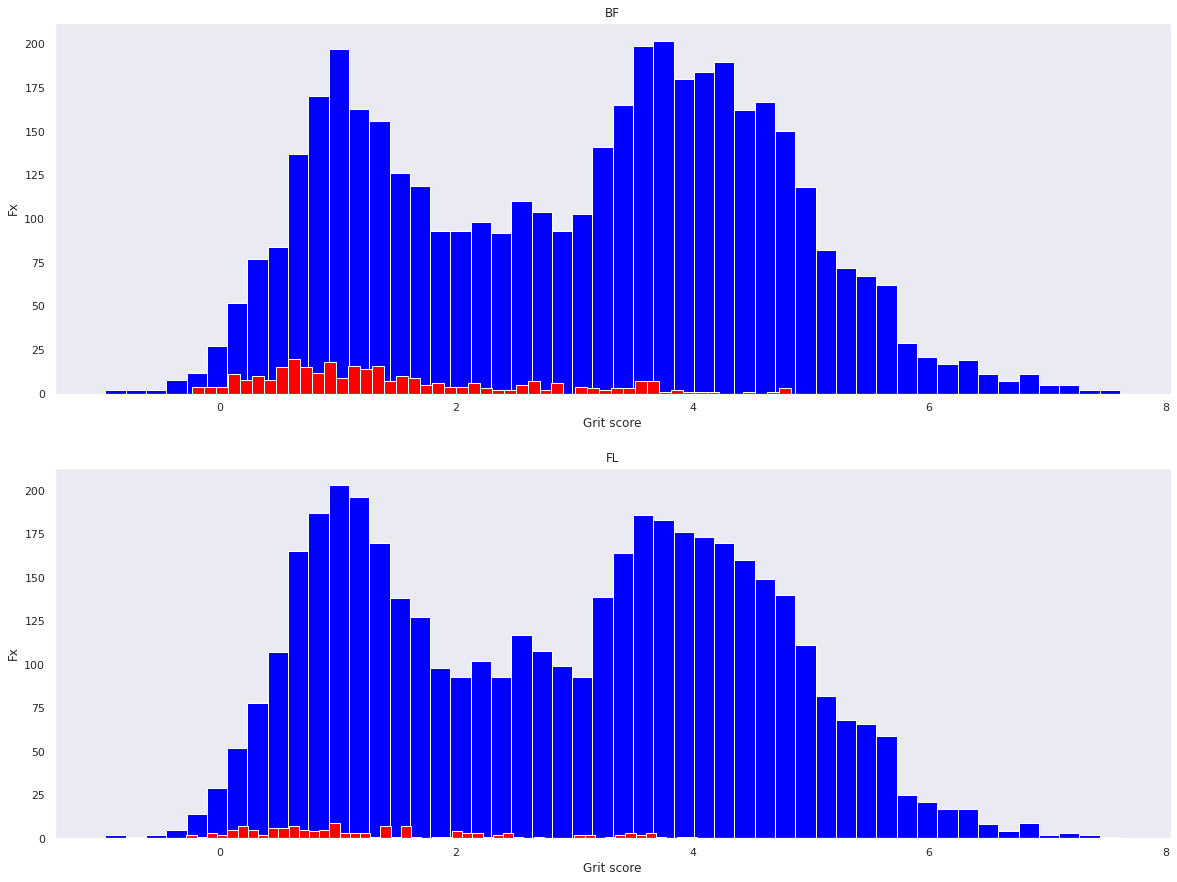

In [43]:
bf_correct = bf_df[bf_df['correct']==1]['grit'].values
bf_false = bf_df[bf_df['false_dmso']==1]['grit'].values

fl_correct = fl_df[fl_df['correct']==1]['grit'].values
fl_false = fl_df[fl_df['false_dmso']==1]['grit'].values

fig = plt.figure(figsize=(20,15))

n_bins = 50
ax = fig.add_subplot(211)
plt.hist(bf_correct, color='blue', bins=n_bins)
plt.hist(bf_false, color='red', bins=n_bins)
plt.title('BF')
plt.xlabel('Grit score')
plt.ylabel('Fx')

ax = fig.add_subplot(212)
plt.hist(fl_correct, color='blue', bins=n_bins)
plt.hist(fl_false, color='red', bins=n_bins)
plt.title('FL')
plt.xlabel('Grit score')
plt.ylabel('Fx')

plt.show()
plt.close()

In [50]:
print('GRIT: AUROC scores (grit <= 6)')
print('BF logistic regression')
bf_df6 = bf_df[bf_df['grit']<=6]
nan_rem = ~np.isnan(bf_df6[['grit', 'nuclei']].to_numpy()).any(axis=1)
X0 = bf_df6[['grit', 'nuclei']].to_numpy()[nan_rem]
scaler = StandardScaler().fit(X0)
X0 = scaler.transform(X0)
X = X0[:, 0].reshape(-1, 1)
y = bf_df6['correct'][nan_rem]
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print(np.round(roc_auc_score(y, clf.predict_proba(X)[:, 1]), 3))

print('FL logistic regression')
fl_df6 = fl_df[fl_df['grit']<=6]
nan_rem = ~np.isnan(fl_df6[['grit', 'nuclei']].to_numpy()).any(axis=1)
X0 = fl_df6[['grit', 'nuclei']].to_numpy()[nan_rem]
scaler = StandardScaler().fit(X0)
X0 = scaler.transform(X0)
X = X0[:, 0].reshape(-1, 1)
y = fl_df6['correct'][nan_rem]
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print(np.round(roc_auc_score(y, clf.predict_proba(X)[:, 1]), 3))

print('CP logistic regression')
cp_df6 = cp_df[cp_df['grit']<=6]
nan_rem = ~np.isnan(cp_df6[['grit', 'nuclei']].to_numpy()).any(axis=1)
X0 = cp_df6[['grit', 'nuclei']].to_numpy()[nan_rem]
scaler = StandardScaler().fit(X0)
X0 = scaler.transform(X0)
X = X0[:, 0].reshape(-1, 1)
y = cp_df6['correct'][nan_rem]
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
print(np.round(roc_auc_score(y, clf.predict_proba(X)[:, 1]), 3))

GRIT: AUROC scores (grit <= 6)
BF logistic regression
0.662
FL logistic regression
0.585
CP logistic regression
0.636


In [46]:
bf_df

,plate,well,site,compound,moa,pred_moa,fv,x,y,split,fl_site,wsc,pws,grit,nuclei,correct,false_dmso
0,P015098,B23,s1,CBK307964,tubulin polymerization inhibitor,tubulin polymerization inhibitor,[0.01201181 0.02938199 0.12136054 ... 0.065279...,8.955906,-3.076284,1,s2,B23s2CBK307964,P015098B23s2,4.756529,20.0,1,0
1,P015098,M18,s1,CBK200945,tubulin polymerization inhibitor,tubulin polymerization inhibitor,[0.1485314 0.06534398 0.2669378 ... 0.126663...,10.560531,-5.793812,1,s2,M18s2CBK200945,P015098M18s2,0.967991,134.0,1,0
2,P015094,D03,s2,CBK308108,PARP inhibitor,PARP inhibitor,[0.0329602 0.22450857 0.07402993 ... 0.138493...,7.398640,10.462826,1,s4,D03s4CBK308108,P015094D03s4,1.602000,70.0,1,0
3,P015099,J19,s1,CBK309391,tubulin polymerization inhibitor,tubulin polymerization inhibitor,[0.0440964 0.01620294 0.15627623 ... 0.066506...,19.748200,0.569540,1,s2,J19s2CBK309391,P015099J19s2,5.247417,14.0,1,0
4,P015091,D15,s1,CBK278556G,HSP inhibitor,HDAC inhibitor,[0.03199631 0.07020781 0.09879724 ... 0.125481...,3.984672,9.286929,1,s2,D15s2CBK278556G,P015091D15s2,1.554916,81.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,P015099,J12,s3,CBK309639,topoisomerase inhibitor,dmso,[0.13341086 0.08241534 0.12715317 ... 0.068725...,1.024916,9.373248,5,s5,J12s5CBK309639,P015099J12s5,0.652909,153.0,0,1
5768,P015085,H05,s4,CBK200551,ATPase inhibitor,ATPase inhibitor,[0.10148454 0.01112736 0.04491092 ... 0.027693...,-2.824093,7.590363,5,s6,H05s6CBK200551,P015085H05s6,5.146022,18.0,1,0
5769,P015099,I16,s1,CBK308876,retinoid receptor agonist,retinoid receptor agonist,[0.07992171 0.05328283 0.15931687 ... 0.064620...,1.953916,9.307144,5,s2,I16s2CBK308876,P015099I16s2,2.462967,199.0,1,0
5770,P015092,H08,s3,CBK293908,JAK inhibitor,PARP inhibitor,[0.05900198 0.23694733 0.07102789 ... 0.149192...,16.045702,5.554844,5,s5,H08s5CBK293908,P015092H08s5,1.791867,111.0,0,0


In [47]:
fl_df

,plate,well,site,compound,moa,pred_moa,fv,x,y,split,pws,grit,nuclei,correct,false_dmso
0,P015076,E23,s2,CBK041182,topoisomerase inhibitor,protein synthesis inhibitor,[0.00393584 0.09419012 0.04442005 ... 0.199352...,-0.925398,0.347152,1,P015076E23s2,4.088734,45.0,0,0
1,P015076,E23,s4,CBK041182,topoisomerase inhibitor,protein synthesis inhibitor,[0.00296363 0.11680281 0.02764179 ... 0.169603...,-0.858445,0.246460,1,P015076E23s4,4.012795,32.0,0,0
2,P015076,E23,s5,CBK041182,topoisomerase inhibitor,protein synthesis inhibitor,[0.00473987 0.13675226 0.05883512 ... 0.228063...,-0.884359,0.323876,1,P015076E23s5,4.093527,47.0,0,0
3,P015076,E23,s6,CBK041182,topoisomerase inhibitor,Aurora kinase inhibitor,[0.00843886 0.08777218 0.03878591 ... 0.199910...,-0.882682,0.279706,1,P015076E23s6,4.053630,37.0,0,0
4,P015076,E23,s8,CBK041182,topoisomerase inhibitor,Aurora kinase inhibitor,[0.00151439 0.10476879 0.05119799 ... 0.217343...,-0.872903,0.310003,1,P015076E23s8,4.083691,46.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,P015099,O07,s2,CBK291076,tubulin polymerization inhibitor,topoisomerase inhibitor,[0.10723029 0.08741632 0.04064837 ... 0.137957...,12.056845,10.662188,5,P015099O07s2,-0.200771,340.0,0,0
5768,P015099,O07,s4,CBK291076,tubulin polymerization inhibitor,JAK inhibitor,[0.06669278 0.16565883 0.02811198 ... 0.056932...,9.744299,0.056232,5,P015099O07s4,0.970956,167.0,0,0
5769,P015099,O07,s5,CBK291076,tubulin polymerization inhibitor,JAK inhibitor,[0.07631809 0.1732721 0.0598111 ... 0.061215...,9.656080,-0.101649,5,P015099O07s5,1.582635,178.0,0,0
5770,P015099,O07,s6,CBK291076,tubulin polymerization inhibitor,protein synthesis inhibitor,[0.1423312 0.12878966 0.06556167 ... 0.071516...,9.786818,0.215306,5,P015099O07s6,1.063400,156.0,0,0


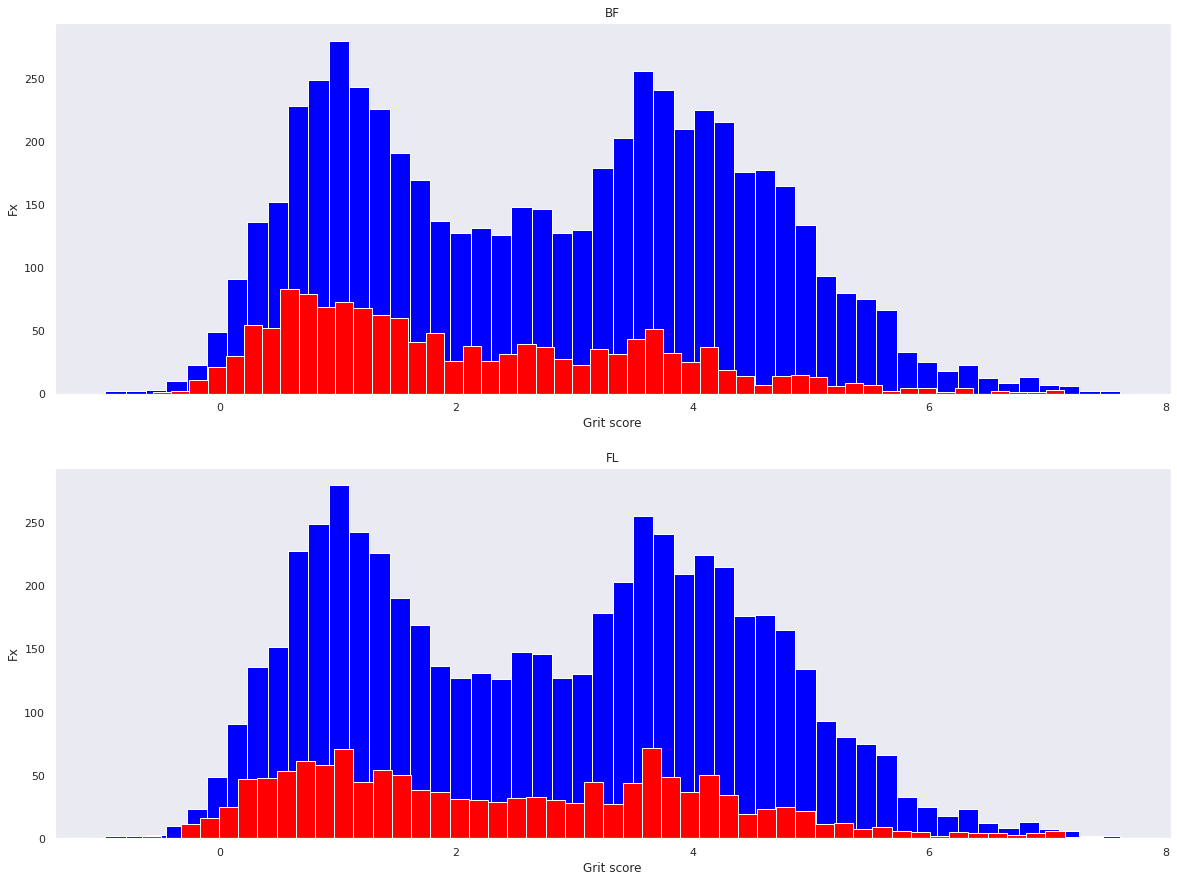

In [52]:
bf_correct = bf_df[bf_df['correct']==1]['grit'].values
bf_false = bf_df[bf_df['correct']==0]['grit'].values

fl_correct = fl_df[fl_df['correct']==1]['grit'].values
fl_false = fl_df[fl_df['correct']==0]['grit'].values

cp_correct = cp_df[cp_df['correct']==1]['grit'].values
cp_false = cp_df[cp_df['correct']==0]['grit'].values

sns.set_theme(style="dark")
fig = plt.figure(figsize=(20,15))

n_bins = 50
ax = fig.add_subplot(211)
plt.hist(bf_df.grit, color='blue', bins=n_bins)
plt.hist(bf_false, color='red', bins=n_bins)
plt.title('BF')
plt.xlabel('Grit score')
plt.ylabel('Fx')

ax = fig.add_subplot(212)
plt.hist(fl_df.grit, color='blue', bins=n_bins)
plt.hist(fl_false, color='red', bins=n_bins)
plt.title('FL')
plt.xlabel('Grit score')
plt.ylabel('Fx')

plt.show()
plt.close()

<AxesSubplot:xlabel='grit', ylabel='Count'>

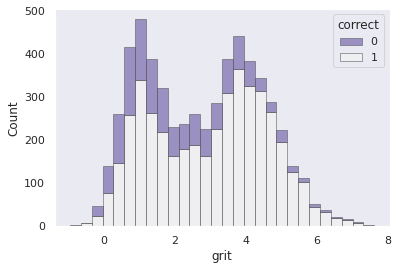

In [55]:
sns.histplot(
    bf_df,
    x="grit", hue="correct",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)


<AxesSubplot:xlabel='grit', ylabel='Count'>

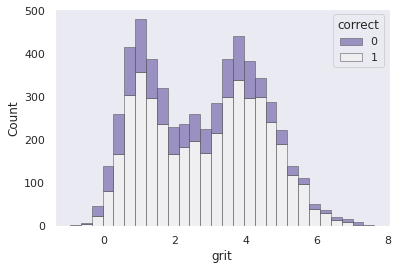

In [56]:
sns.histplot(
    fl_df,
    x="grit", hue="correct",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)

In [57]:
bf_df['prediction'] = np.where(bf_df['moa']==bf_df['pred_moa'], 'correct', 'incorrect')

In [59]:
fl_df['prediction'] = np.where(fl_df['moa']==fl_df['pred_moa'], 'correct', 'incorrect')

In [85]:
cp_df['prediction'] = np.where(cp_df['moa']==cp_df['pred_moa'], 'correct', 'incorrect')

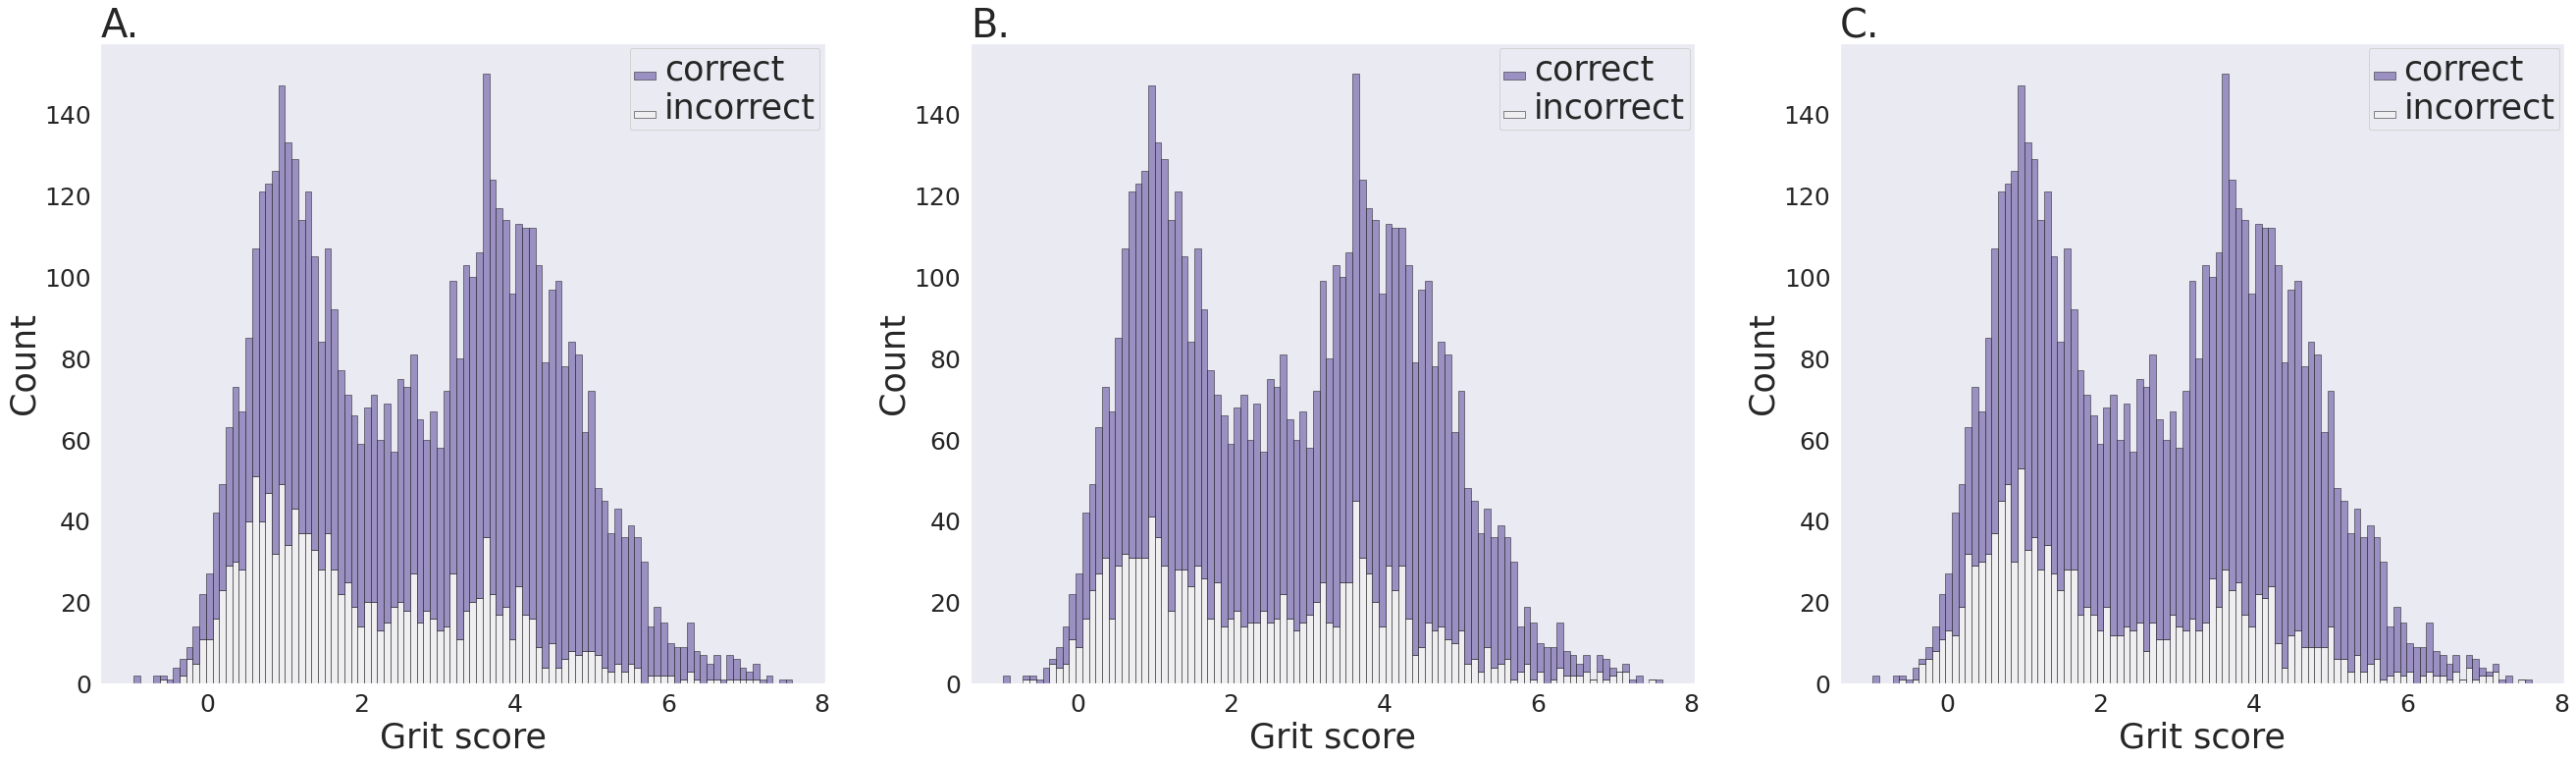

In [93]:
sns.set_theme(style="dark")
fig = plt.figure(figsize=(45,12))

ax = fig.add_subplot(131)
n_bins = 100
ax = sns.histplot(
    bf_df,
    bins=n_bins,
    x="grit", hue="prediction",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".1",
    linewidth=.5,
)
ax.legend_.set_title(None)
plt.setp(ax.get_legend().get_texts(), fontsize='35')
ax.set_title('A.', loc='left', fontsize=40)
ax.set_xlabel('Grit score', fontsize=35)
ax.set_ylabel('Count', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax = fig.add_subplot(132)

sns.histplot(
    fl_df,
    bins=n_bins,
    x="grit", hue="prediction",
    hue_order = ["correct", "incorrect"],
    multiple="stack",
    palette="light:m_r",
    edgecolor=".1",
    linewidth=.5,
)
ax.legend_.set_title(None)
plt.setp(ax.get_legend().get_texts(), fontsize='35')
ax.set_title('B.', loc='left', fontsize=40)
ax.set_xlabel('Grit score', fontsize=35)
ax.set_ylabel('Count', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax = fig.add_subplot(133)

sns.histplot(
    cp_df,
    bins=n_bins,
    x="grit", hue="prediction",
    hue_order = ["correct", "incorrect"],
    multiple="stack",
    palette="light:m_r",
    edgecolor=".1",
    linewidth=.5,
)
ax.legend_.set_title(None)
plt.setp(ax.get_legend().get_texts(), fontsize='35')
ax.set_title('C.', loc='left', fontsize=40)
ax.set_xlabel('Grit score', fontsize=35)
ax.set_ylabel('Count', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('LMRL_grit_hist.png', bbox_inches='tight', format='png')

plt.show()
plt.close()